<a href="https://colab.research.google.com/github/Fekry2016/data-analysis-with-python/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Regressoin Models
## Segment 1 - Simple linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [4]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [5]:
rooms = 2*np.random.rand(100, 1)+3
rooms[1:10]

array([[4.68346281],
       [3.86406919],
       [3.28138476],
       [4.27553357],
       [4.49701097],
       [3.624975  ],
       [4.34462041],
       [3.09464156],
       [3.90407781]])

In [6]:
price = 265 + 6*rooms +abs(np.random.randn(100, 1))
price[1:10]

array([[294.0555499 ],
       [288.24632169],
       [285.49216236],
       [291.12719016],
       [292.22080465],
       [288.14448651],
       [291.95265974],
       [284.10329257],
       [289.52401219]])

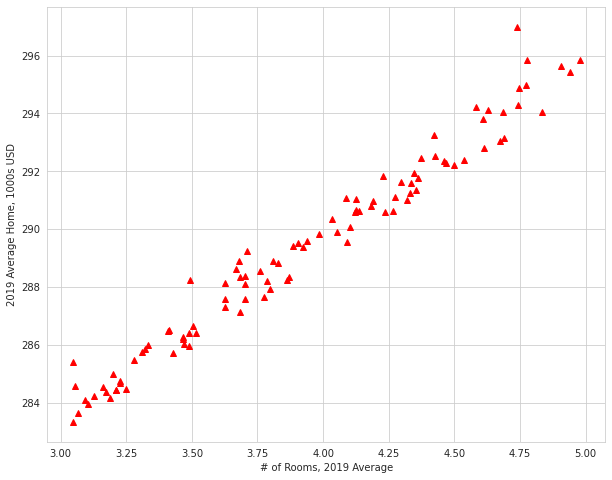

In [7]:
plt.plot(rooms, price, 'r^')
plt.xlabel("# of Rooms, 2019 Average")
plt.ylabel("2019 Average Home, 1000s USD")
plt.show()

In [8]:
X = rooms
y = price

LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

[264.95081664] [[6.20846061]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.7

*Estimated Coefficients*
- LinReg.coef_ = [5.99] Estimated coefficients for the terms in the linear regression problem.

**Model Evaluation - R^2 👇👇**

In [9]:
print(LinReg.score(X,y))

0.9686618410032236


**Segment 2 - Multiple linear regression**

**(Multiple) linear regression on the enrollment data**

In [10]:
address = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSDKk4UPR6v4wxEMnVQ7ySU69iiSft0lazcvl-UlNfmBZ2k2AAG3mI5IQjDSFxk6DTrmbf4UapVC5uY/pub?output=csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


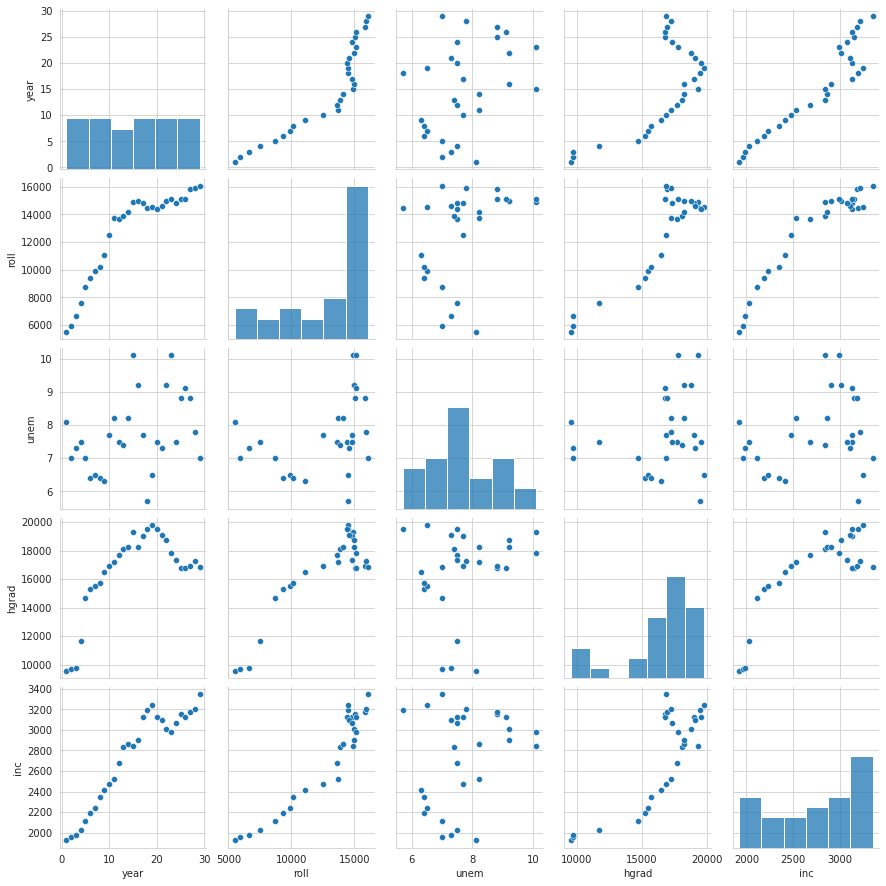

In [11]:
sb.pairplot(enroll)

In [12]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [13]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

**Checking for missing values**

In [14]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [15]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
